In [3]:
import numpy as np 
import pandas as pd 

import pickle
import itertools

import seaborn 

from pylab import *

import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt 
%matplotlib inline  

In [7]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
        
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels, n, mu):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('n = {0}, $\mu$ = {1}'.format(n, mu))

In [10]:

def save_plot( setting ): 

    plt.rcParams['font.size'] = 17.5
    plt.rcParams['figure.figsize'] = 4,4

    ns = [10,20,30] 
    alphas = [1]  
    betas = [1./2]  
    mus = [0.01, 0.001] 

    n_alpha_mu_beta = list( itertools.product( ns, alphas, mus, betas ) ) 
    n_mu = list( itertools.product( ns, mus ) ) 

    for (n, mu ) in n_mu: 

        g_errors, b_errors, g_vars, b_vars = pickle.load( open( './{0}/n={1}_mu={2}'.format(setting, n, mu) , 'rb' ) ) 

        data = [g_errors, b_errors] 

        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 3.5), sharey=True) 

    #     ax1.set_ylabel('Estimation Error') 
    #     seaborn.violinplot( data=data, palette=['r','b','b','b'], ax = ax1 ) 
        ax1.violinplot( data ) 

        quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1) 
        whiskers = np.array([
            adjacent_values(sorted_array, q1, q3) 
            for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
        whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1] 


        plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False) 
        
        num_digits = int( np.log10( np.max( data ) ) )

        locs,labels = yticks()
        yticks(locs, map(lambda x: "%.1f" % x, locs/(10**num_digits )) )
        text(0.0, 1.01, 'x$10^{}$'.format(num_digits), fontsize=14, transform = gca().transAxes) 
    
#         plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
        labels = ['G', 'S' ]  
        for ax in [ax1]: 
            set_axis_style(ax, labels, n, mu)  

        plt.subplots_adjust(bottom=0.15, wspace=0.05)  

        plt.tight_layout()  
        plt.show() 
#         plt.savefig('{0}_errors_n={1}_mu={2}.png'.format(setting, n, mu) , dpi = 150) 

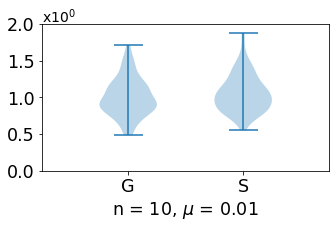

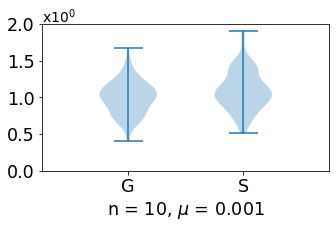

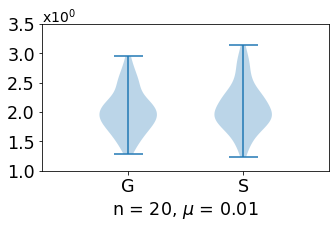

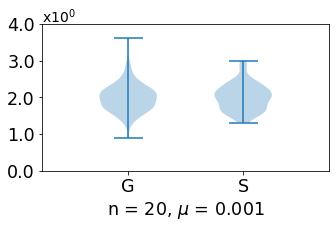

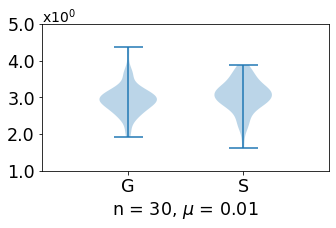

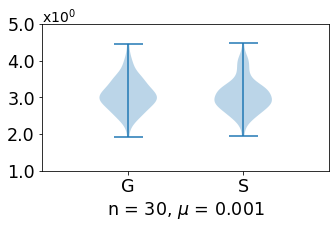

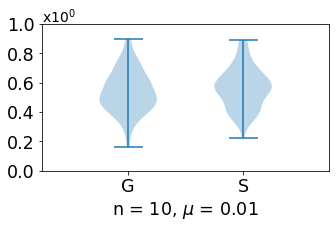

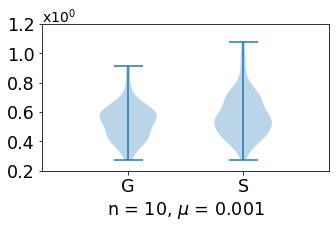

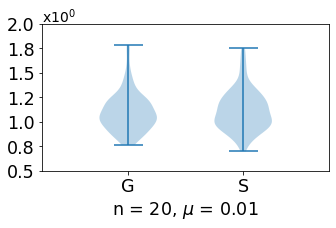

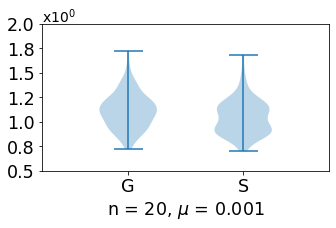

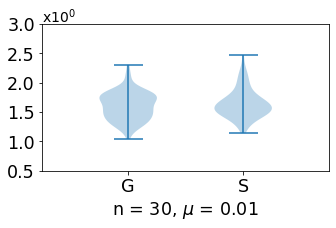

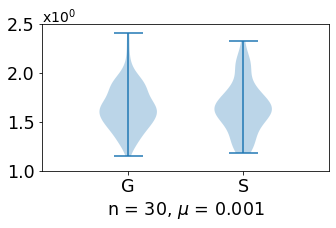

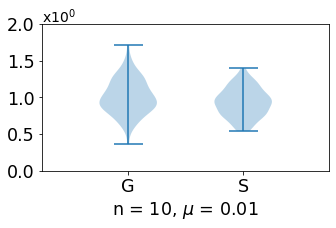

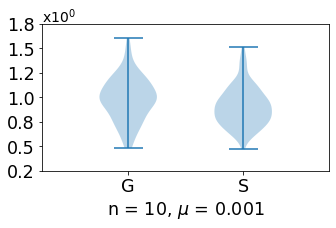

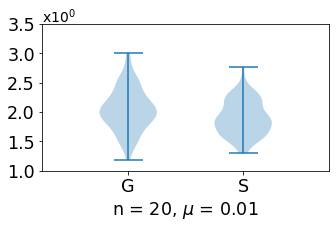

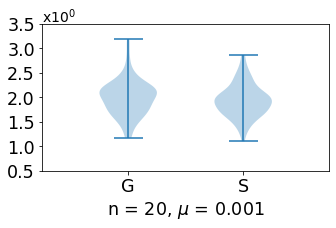

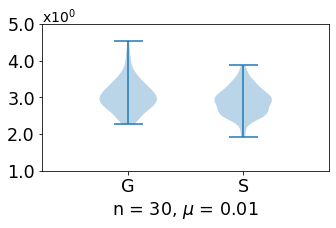

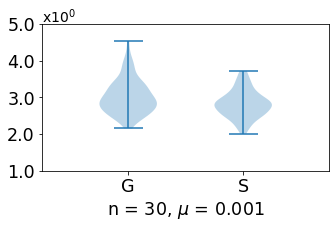

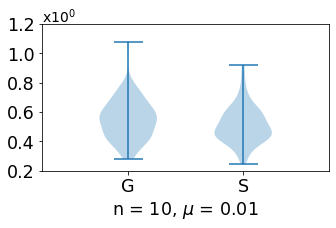

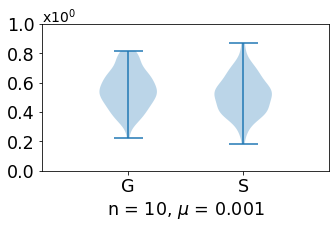

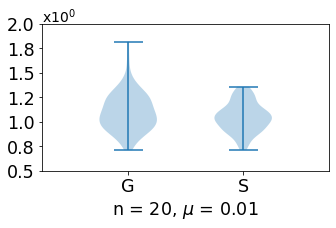

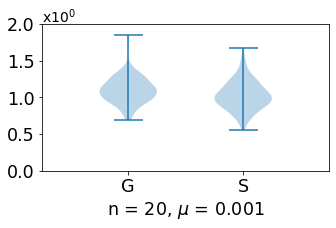

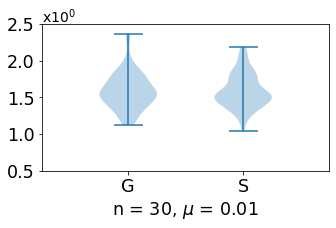

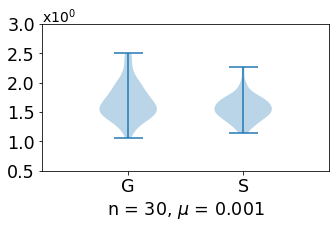

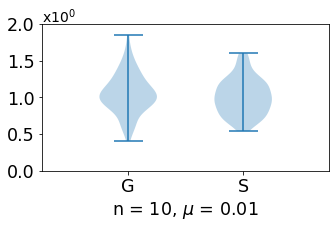

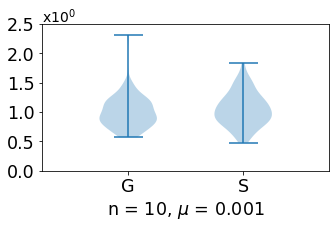

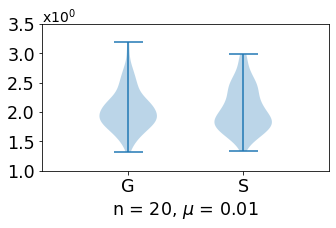

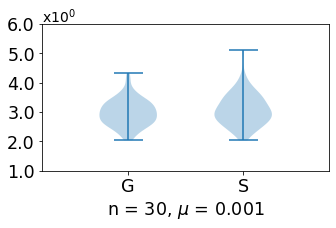

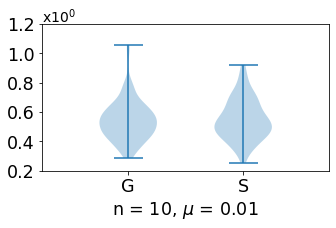

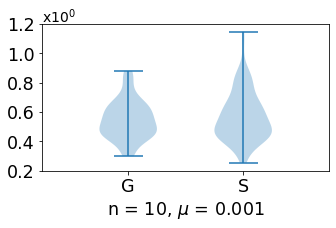

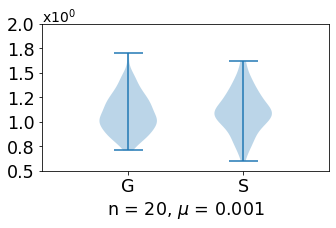

In [11]:
# plot the errors

settings = ['sphere_lin', 'sphere_nonlin', 'euc_lin', 'euc_nonlin', 'surface_lin', 'surface_nonlin' ]

for s in settings:  
    save_plot( s ) 

In [14]:

def save_plot( setting ): 

    plt.rcParams['font.size'] = 17.5
    plt.rcParams['figure.figsize'] = 4,4

    ns = [10,20,30] 
    alphas = [1]  
    betas = [1./2]  
    mus = [0.01, 0.001] 

    n_alpha_mu_beta = list( itertools.product( ns, alphas, mus, betas ) ) 
    n_mu = list( itertools.product( ns, mus ) ) 

    for (n, mu ) in n_mu: 

        g_errors, b_errors, g_vars, b_vars = pickle.load( open( './{0}/n={1}_mu={2}'.format(setting, n, mu) , 'rb' ) ) 

        data = [g_vars, b_vars] 

        fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5, 3.5), sharey=True) 

    #     ax1.set_ylabel('Estimation Error') 
    #     seaborn.violinplot( data=data, palette=['r','b','b','b'], ax = ax1 ) 
        ax1.violinplot( data ) 

        quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1) 
        whiskers = np.array([
            adjacent_values(sorted_array, q1, q3) 
            for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
        whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1] 


        plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False) 
        
        num_digits = int( np.log10( np.max( data ) ) )

        locs,labels = yticks()
        yticks(locs, map(lambda x: "%.1f" % x, locs/(10**num_digits )) )
        text(0.0, 1.01, 'x$10^{}$'.format(num_digits), fontsize=14, transform = gca().transAxes) 
    
#         plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    
        labels = ['G', 'S' ]  
        for ax in [ax1]: 
            set_axis_style(ax, labels, n, mu)  

        plt.subplots_adjust(bottom=0.15, wspace=0.05)  

        plt.tight_layout()  
        plt.show() 
#         plt.savefig('{0}_errors_n={1}_mu={2}.png'.format(setting, n, mu) , dpi = 150) 

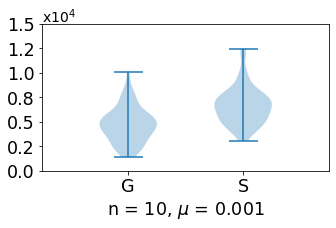

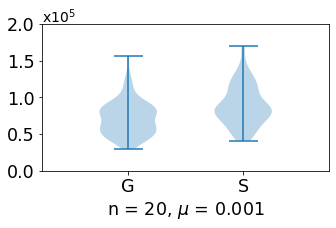

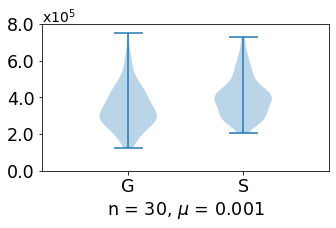

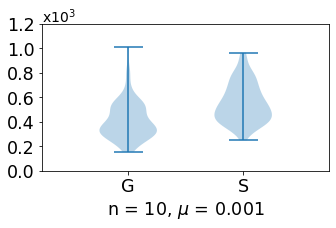

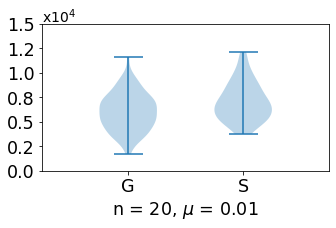

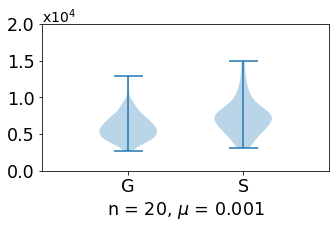

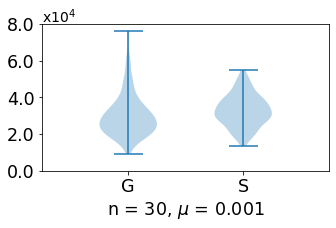

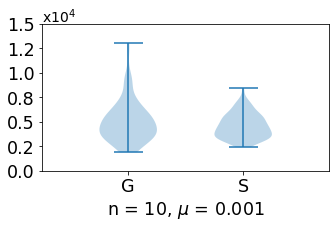

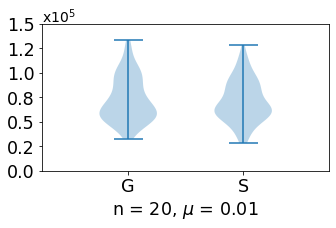

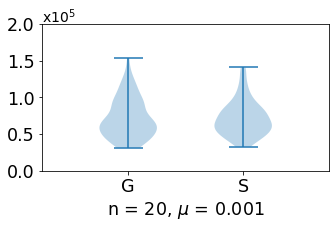

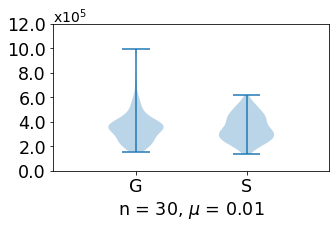

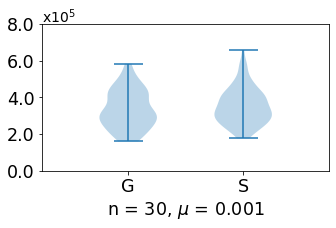

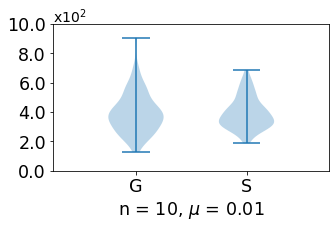

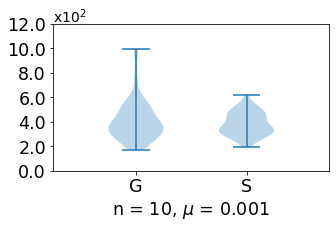

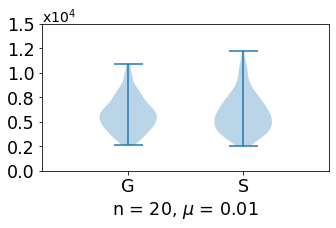

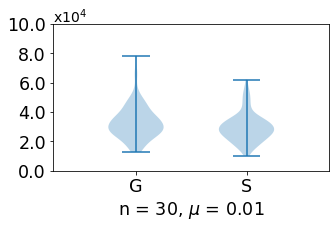

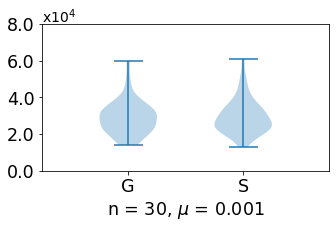

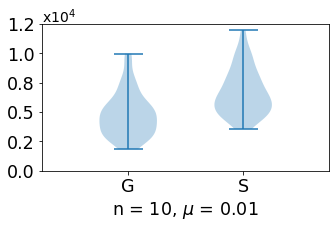

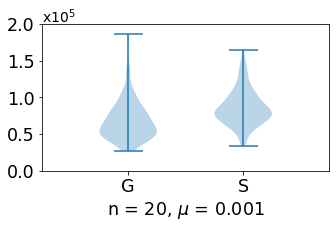

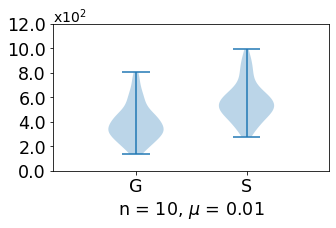

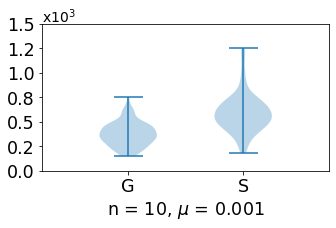

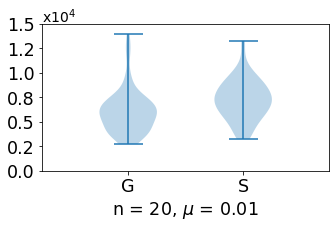

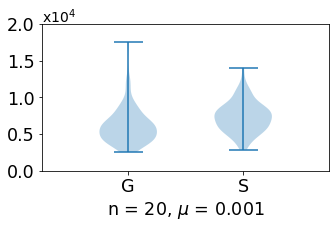

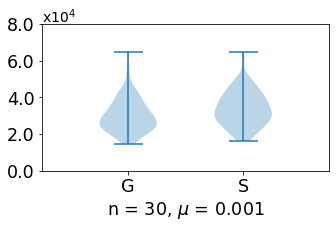

In [15]:
# plot the robustness

settings = ['sphere_lin', 'sphere_nonlin', 'euc_lin', 'euc_nonlin', 'surface_lin', 'surface_nonlin' ]

for s in settings:  
    save_plot( s ) 